In [1]:
from meshes.truss_like_mesh import truss_like_cross
from pybandgap.fem import Fem
from pybandgap.structure import SetStructure
from pybandgap.bandgap import BandGap
import numpy as np

In [2]:
def create_linear_function(a1, a2):
    """Create a linear function between two values."""
    return lambda x: (a2 - a1) * x + a1

mesh, *_ = truss_like_cross()

A_funtion =  create_linear_function(np.pi*4e-6,
                                    np.pi*16e-6)

E_funtion =  create_linear_function(70e9,
                                    411e9)

rho_funtion =  create_linear_function(2.7e3,
                                      19.3e3)
    
fem = Fem(mesh, {'A':A_funtion,
                 'E': E_funtion,
                 'rho': rho_funtion})
    
structure = SetStructure(fem,
                        'square',
                        symmetries = {
                            'angles': [0, np.pi/2, np.pi/4],
                            'directions': ["above", "below", "below"]}
                        )
    
structure.get_elements_IBZ()

[1, 2, 4, 8, 10, 11, 12, 13, 14, 20, 21, 25]


In [3]:
structure.set_props('E', 'x', np.array([1, 2, 4, 8]), 1)
structure.set_props('rho', 'x', np.array([1, 2, 4, 8]), 1)
structure.set_props('A', 'x', np.array([1, 2, 4, 8, 13]), 1)
structure.apply_symmetry()

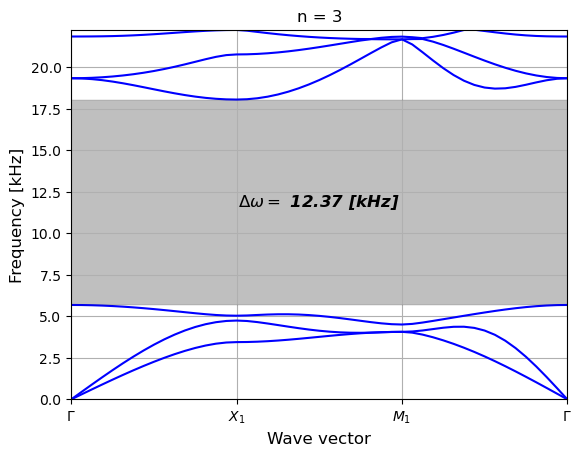

In [4]:
bg = BandGap(structure,
             NINT=60,
             n = 3)

bg.plot_bandgap()